In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: [Monday, Mar 10, 11:59 pm](https://github.com/UBC-CS/cpsc330-2024W2?tab=readme-ov-file#deliverable-due-dates-tentative)**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W2/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W2/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [2]:
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

I chose to work with the Airbnb NYC dataset. My initial thoughts are that its a large amount of data (~49k) which leaves us with lots of samples to train/test on. Furthermore, the dataset seems to have minimal missing data and has a strong focus on geographical location with not just the neighbourhood but also the latitude and logitude of the listing. The problem itself focuses on predicting reviews_per_month for listings using factors like price, location, and room type (among some others in the dataset). From initially looking at these features, I feel they can be correlated well with the reviews_per_month since a fair price, good location, and aqequate room type leads to more people staying at the listing which leads to more reviews or vice-versa.

In [3]:
airbnb_df = pd.read_csv("AB_NYC_2019.csv", index_col=0)

airbnb_df

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [4]:
airbnb_df = airbnb_df.drop(columns=["host_id","last_review"])
train_df, test_df = train_test_split(airbnb_df, test_size=0.70, random_state=123)

train_df


,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,
28330508,East village sanctuary,Matthew,Manhattan,East Village,40.72778,-73.98747,Entire home/apt,250,31,1,0.11,1,156
32874857,Luxury Studio High Rise 10 mins from Times Sq NY!,Evelyn,Queens,Long Island City,40.74881,-73.94316,Entire home/apt,130,3,1,0.50,7,24
3655007,Great Room for International Students!,Sharon,Bronx,Wakefield,40.88855,-73.85127,Private room,50,7,12,0.55,1,0
22406109,COZY STUDIO IN THE HEART OF CENTRAL HARLEM!,Asya,Manhattan,Harlem,40.81911,-73.93794,Entire home/apt,90,2,38,2.05,1,25
29883990,South Williamsburg Room,Carly,Brooklyn,Williamsburg,40.70956,-73.95305,Private room,65,2,9,1.15,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5885201,SUNNY ROOM A IN CHARMING AREA :),Graham And Ben,Brooklyn,Bedford-Stuyvesant,40.69363,-73.95980,Private room,95,30,40,0.80,11,331
12325045,IDEAL One bedroom apt by Central Park!,K Alexandra,Manhattan,Midtown,40.76016,-73.96910,Entire home/apt,139,2,132,3.66,1,154
13915004,"Sunlit, spacious NY apartment",Dani,Manhattan,Harlem,40.80380,-73.95569,Entire home/apt,250,3,10,0.28,1,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10


A. The .describe() summary gives us valuable statistical data on each feature which can specifically help us analyze the quality of the data set based on count, spread,etc.   
B. This summary statistic shows us how many empty values we have across features+target, since we are working with a large dataset, these samples with empty values will be removed.  
C. The heatmap visualization shows most numerical features have a low correlation value with eachother aswell as with the target (reviews_per_month), however, the largest correlation is between the feature number_of_reviews and the target with a correlation of 0.56.  
D. The histogram on the target helps us determine the spread of data on the target, specifically how its distributed, if its symmetric, left skewed, or right skewed. This helps us to determine which metric to use and can potentially help us determine if a log transformer is needed (if the skew is not symmetric).    

3. From my analysis I can see the data is great but not perfect. Some additional cleanup will be required on top of the column transformations, including things such as removal of some rows due to missing data and log transforming on the target. Based on the heatmap we can also see that individually, a given feature cant determine the targets value, this means our predictions will likely be determined based of a combination of our features and wont be limited to be heavily dependant on a single feature (aside from maybe number_of_reviews).
4. Since our target is skewed, it may not be best practice to solely rely on the default R^2. For this reason, we'll focus on Root Mean Squared Error as our main metric.

In [5]:
...

Ellipsis

In [6]:
(train_df).describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,14668.000000,14668.000000,14668.000000,14668.000000,14668.000000,11682.000000,14668.000000,14668.000000
mean,40.728951,-73.951374,150.803041,7.149032,23.089855,1.356303,6.732002,111.907895
std,0.054727,0.046613,232.976228,24.708738,44.061263,1.646529,31.331361,131.447689
min,40.507080,-74.242850,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.689963,-73.982503,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.722800,-73.955170,105.000000,3.000000,5.000000,0.690000,1.000000,43.000000
75%,40.763480,-73.935703,175.000000,5.000000,23.000000,2.000000,2.000000,223.000000
max,40.912340,-73.712990,9999.000000,1250.000000,629.000000,20.940000,327.000000,365.000000


In [7]:
...

Ellipsis

In [8]:
...

Ellipsis

In [9]:
train_df.isnull().sum()

name                                 7
host_name                            5
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 2986
calculated_host_listings_count       0
availability_365                     0
dtype: int64

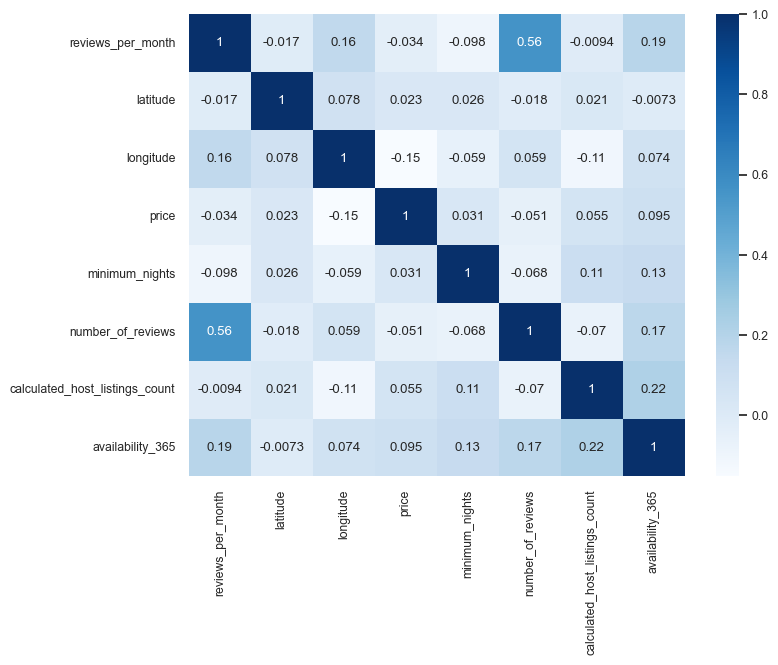

In [10]:

numerical_train = train_df.drop(columns=["name","neighbourhood","neighbourhood_group","room_type","host_name","reviews_per_month"]) #remove non-numerical for heatmap

#Adapted from lecture slides
cor = pd.concat((train_df["reviews_per_month"], numerical_train), axis=1).iloc[:, :10].corr()
plt.figure(figsize=(8, 6))
sns.set(font_scale=0.8)
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues);

In [11]:
...

Ellipsis

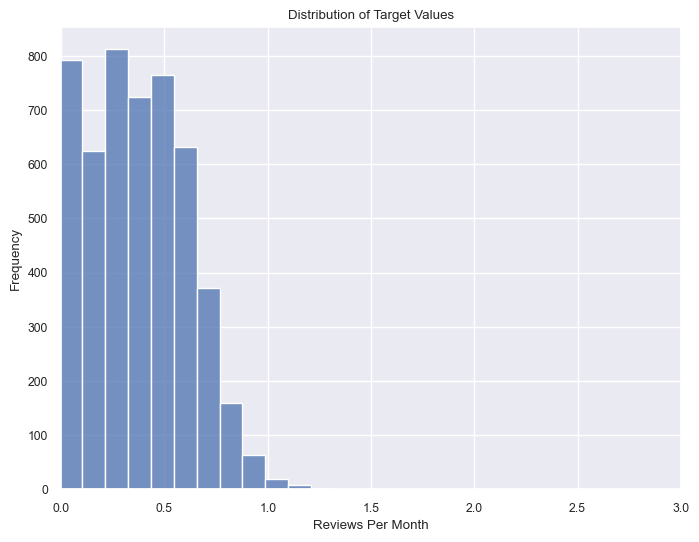

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(np.log10(train_df["reviews_per_month"]), bins=30)
plt.xlim(0, 3) 
plt.title("Distribution of Target Values")
plt.xlabel("Reviews Per Month")
plt.ylabel("Frequency")
plt.show()

In [13]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

In [14]:
discretization_feats = ["latitude", "longitude"] 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [15]:

train_df = train_df.dropna()
test_df = test_df.dropna()

X_train, y_train = (
    train_df.drop(columns=["reviews_per_month"]),
    train_df["reviews_per_month"],
)

X_test, y_test = (
    test_df.drop(columns=["reviews_per_month"]),
    test_df["reviews_per_month"],
)
X_train


,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,
28330508,East village sanctuary,Matthew,Manhattan,East Village,40.72778,-73.98747,Entire home/apt,250,31,1,1,156
32874857,Luxury Studio High Rise 10 mins from Times Sq NY!,Evelyn,Queens,Long Island City,40.74881,-73.94316,Entire home/apt,130,3,1,7,24
3655007,Great Room for International Students!,Sharon,Bronx,Wakefield,40.88855,-73.85127,Private room,50,7,12,1,0
22406109,COZY STUDIO IN THE HEART OF CENTRAL HARLEM!,Asya,Manhattan,Harlem,40.81911,-73.93794,Entire home/apt,90,2,38,1,25
29883990,South Williamsburg Room,Carly,Brooklyn,Williamsburg,40.70956,-73.95305,Private room,65,2,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5885201,SUNNY ROOM A IN CHARMING AREA :),Graham And Ben,Brooklyn,Bedford-Stuyvesant,40.69363,-73.95980,Private room,95,30,40,11,331
12325045,IDEAL One bedroom apt by Central Park!,K Alexandra,Manhattan,Midtown,40.76016,-73.96910,Entire home/apt,139,2,132,1,154
13915004,"Sunlit, spacious NY apartment",Dani,Manhattan,Harlem,40.80380,-73.95569,Entire home/apt,250,3,10,1,0


In [16]:
numeric_feats = [
    "price",
    "minimum_nights",
    "number_of_reviews",
    "calculated_host_listings_count",
    "availability_365",
] 
categorical_feats = ["neighbourhood_group","neighbourhood", "room_type"]  

text_feats = "name"





In [17]:
ct = make_column_transformer(
    (make_pipeline(SimpleImputer(), StandardScaler()), numeric_feats),   
    (OneHotEncoder(handle_unknown="ignore"), categorical_feats),  
    (CountVectorizer(stop_words="english", min_df=2,max_features=300), text_feats),
    (KBinsDiscretizer(n_bins=20, encode="onehot"), discretization_feats),
 
)

In [18]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [19]:
baseline = DummyRegressor()
pd.DataFrame(cross_validate(baseline, X_train, y_train, cv=5, return_train_score=True))

,fit_time,score_time,test_score,train_score
0,0.003141,0.001007,-0.000001,0.0
1,0.002152,0.000000,-0.000279,0.0
2,0.002000,0.001000,-0.000084,0.0
3,0.001000,0.001000,-0.000649,0.0
4,0.002000,0.000000,-0.002858,0.0


In [20]:
...

Ellipsis

In [21]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [22]:
pipe_linear = make_pipeline(ct, Ridge())
scores_linear = cross_validate(pipe_linear, X_train, y_train, return_train_score=True)
pd.DataFrame(scores_linear)




,fit_time,score_time,test_score,train_score
0,0.137302,0.031943,0.416218,0.435400
1,0.122717,0.035720,0.336779,0.452890
2,0.124600,0.030735,0.344605,0.450224
3,0.142256,0.024488,0.409992,0.435213
4,0.126565,0.025222,0.357784,0.446815


In [23]:
...

Ellipsis

In [24]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

Summarizing the results of all 3 of the models below, we see that in random forest we have overfitting due to the high train_score and low test_score in each fold. In SVR, we have a potential underfitting due to a relatively low train_score. Lastly, with decision tree, we have extremely high overfitting due to the default parameters for decision tree having an unlimited depth.

In [25]:
pipe_random_tree = make_pipeline(ct, RandomForestRegressor(n_jobs=-1,random_state=123))

cv_scores = cross_validate(pipe_random_tree, X_train, y_train, cv=4,return_train_score=True)
pd.DataFrame(cv_scores)

,fit_time,score_time,test_score,train_score
0,9.232672,0.054909,0.563875,0.930175
1,10.512296,0.068247,0.506454,0.933746
2,14.424763,0.068557,0.501334,0.934016
3,14.023705,0.074084,0.516529,0.934909


In [26]:

pipe_svr = make_pipeline(ct, SVR())

cv_scores_svr = cross_validate(pipe_svr, X_train, y_train, cv=4,return_train_score=True)
pd.DataFrame(cv_scores_svr)


,fit_time,score_time,test_score,train_score
0,4.887546,1.247149,0.429534,0.538191
1,4.911463,1.237778,0.400018,0.549106
2,4.874099,1.256388,0.392647,0.553374
3,4.814068,1.280021,0.434831,0.544458


In [27]:
pipe_dt = make_pipeline(ct, DecisionTreeRegressor())

cv_scores_dt = cross_validate(pipe_dt, X_train, y_train, cv=4,return_train_score=True)
pd.DataFrame(cv_scores_dt)


,fit_time,score_time,test_score,train_score
0,1.105615,0.029988,0.063606,1.0
1,1.094360,0.026402,0.090623,1.0
2,1.066592,0.027410,0.182707,1.0
3,1.106356,0.028154,0.113896,1.0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

From applying RFECV, we can observe that for this particular arrangement of features and data, utilizing RFECV seems to make no difference from our original linear regression model (ridge) as shown below. For this reason, we will abandon this for the remainder of the steps.

In [28]:


train_dropped_df = train_df.drop(columns=["host_name", "neighbourhood"])
test_dropped_df = test_df.drop(columns=["host_name", "neighbourhood"])

X_train_dropped, y_train_dropped = (
    train_dropped_df.drop(columns=["reviews_per_month"]),
    train_dropped_df["reviews_per_month"],
)

X_test_dropped, y_test_dropped = (
    test_dropped_df.drop(columns=["reviews_per_month"]),
    test_dropped_df["reviews_per_month"],
)


numeric_feats = [
    "price",
    "minimum_nights",
    "number_of_reviews",
    "calculated_host_listings_count",
    "availability_365",
] 
categorical_feats = ["neighbourhood_group", "room_type"]  
text_feats = "name"

discretization_feats = ["latitude", "longitude"] 


ct = make_column_transformer(
    (make_pipeline(SimpleImputer(), StandardScaler()), numeric_feats),   
    (OneHotEncoder(handle_unknown="ignore"), categorical_feats),  
    (CountVectorizer(stop_words="english", min_df=2,max_features=300), text_feats),
    (KBinsDiscretizer(n_bins=20, encode="onehot"), discretization_feats), 
)


pipeline_rfecv = Pipeline([
    ('preprocessing', ct),
('feature_selection', RFECV(estimator=Ridge(),
                                cv=3,
                                scoring='r2',
                                step=0.1,
                                n_jobs=-1)),
    ('model', Ridge(random_state=123))
])

scores = cross_validate(pipeline_rfecv, X_train, y_train, return_train_score=True)

print("RFEC linear:")
print(pd.DataFrame(scores))
print("default linear:")
print(pd.DataFrame(scores_linear))



RFEC linear:
   fit_time  score_time  test_score  train_score
0  2.957340    0.025655    0.424274     0.415904
1  1.940410    0.031410    0.341630     0.434229
2  1.887136    0.022310    0.356482     0.431384
3  1.613131    0.030379    0.412086     0.417238
4  2.032645    0.026961    0.362605     0.428491
default linear:
   fit_time  score_time  test_score  train_score
0  0.137302    0.031943    0.416218     0.435400
1  0.122717    0.035720    0.336779     0.452890
2  0.124600    0.030735    0.344605     0.450224
3  0.142256    0.024488    0.409992     0.435213
4  0.126565    0.025222    0.357784     0.446815


In [29]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [30]:


alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]

pipe_linear_optimize = make_pipeline(ct, RidgeCV(alphas=alphas))

pipe_linear_optimize.fit(X_train, y_train)

best_alpha = pipe_linear_optimize.named_steps['ridgecv'].alpha_
train_score = pipe_linear_optimize.score(X_train, y_train)
print(f"score: {train_score}")
print(f"best alpha: {best_alpha}")


score: 0.4204800187936596
best alpha: 10.0


In [31]:
...

Ellipsis

In [32]:
...

Ellipsis

In [33]:
...

Ellipsis

In [34]:
...

Ellipsis

In [35]:
...

Ellipsis

In [36]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [37]:
...

Ellipsis

In [38]:
...

Ellipsis

In [39]:
...

Ellipsis

In [40]:
...

Ellipsis

In [41]:
...

Ellipsis

In [42]:
...

Ellipsis

In [43]:
...

Ellipsis

In [44]:
...

Ellipsis

In [45]:
...

Ellipsis

In [46]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

In [47]:

pipe_linear = make_pipeline(ct, Ridge())
scores_linear = cross_validate(pipe_linear, X_train, y_train, return_train_score=True)


pipe_linear.fit(X_train, y_train)


y_pred = pipe_linear.predict(X_test)




r2 = r2_score(y_test, y_pred)

print(f'R² Score: {r2}')

R² Score: 0.3479686101869486


In [48]:
...

Ellipsis

In [49]:
...

Ellipsis

In [50]:
...

Ellipsis

In [51]:
...

Ellipsis

In [52]:
...

Ellipsis

In [53]:
...

Ellipsis

In [54]:
...

Ellipsis

In [55]:
...

Ellipsis

In [56]:
...

Ellipsis

In [57]:
...

Ellipsis

In [58]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [59]:
...

Ellipsis

In [60]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

My biggest takeaway from the supervised material both in-class and through examples/assignments would definitely be that a complex model is not always the best idea, keeping things simple proves to be more accurate in many cases. Focusing on the quality of the data should instead be the main priority whether that be cleaning it up, feature engineering, or even transforming the data. This focus on building the data to feed into the model rather than building the most complex model is not something I would have considered to be the main focus prior to taking this course.

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)